In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

In [2]:
train = pd.read_csv('Customer_data/train.csv')
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [3]:
train.shape

(1108, 22)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Dt_Customer          1108 non-null   object 
 8   Recency              1108 non-null   int64  
 9   NumDealsPurchases    1108 non-null   int64  
 10  NumWebPurchases      1108 non-null   int64  
 11  NumCatalogPurchases  1108 non-null   int64  
 12  NumStorePurchases    1108 non-null   int64  
 13  NumWebVisitsMonth    1108 non-null   int64  
 14  AcceptedCmp3         1108 non-null   int64  
 15  AcceptedCmp4         1108 non-null   i

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 칼럼은 : {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다.')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다.


In [6]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

day, month, year = seperate_datetime(train)

train['year'] = year
train['month'] = month
train['day'] = day

train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,0,541,2013,1,21
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,0,899,2014,5,24
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,0,901,2013,4,8
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,0,50,2014,3,29
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,0,1,0,0,0,444,2014,6,10


In [7]:
train.drop('Dt_Customer', axis=1, inplace=True)
train.shape

(1108, 24)

In [8]:
categorical = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
               'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
quantitative = ['Year_Birth', 'Income', 'year',	'month', 'day',
                'Recency', 'NumDealsPurchases', 'NumWebPurchases',
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

print(f'카테고리형(정성적) column : {len(categorical)} 개')
print(f'수치형(정량적) column : {len(quantitative)} 개')

카테고리형(정성적) column : 11 개
수치형(정량적) column : 11 개


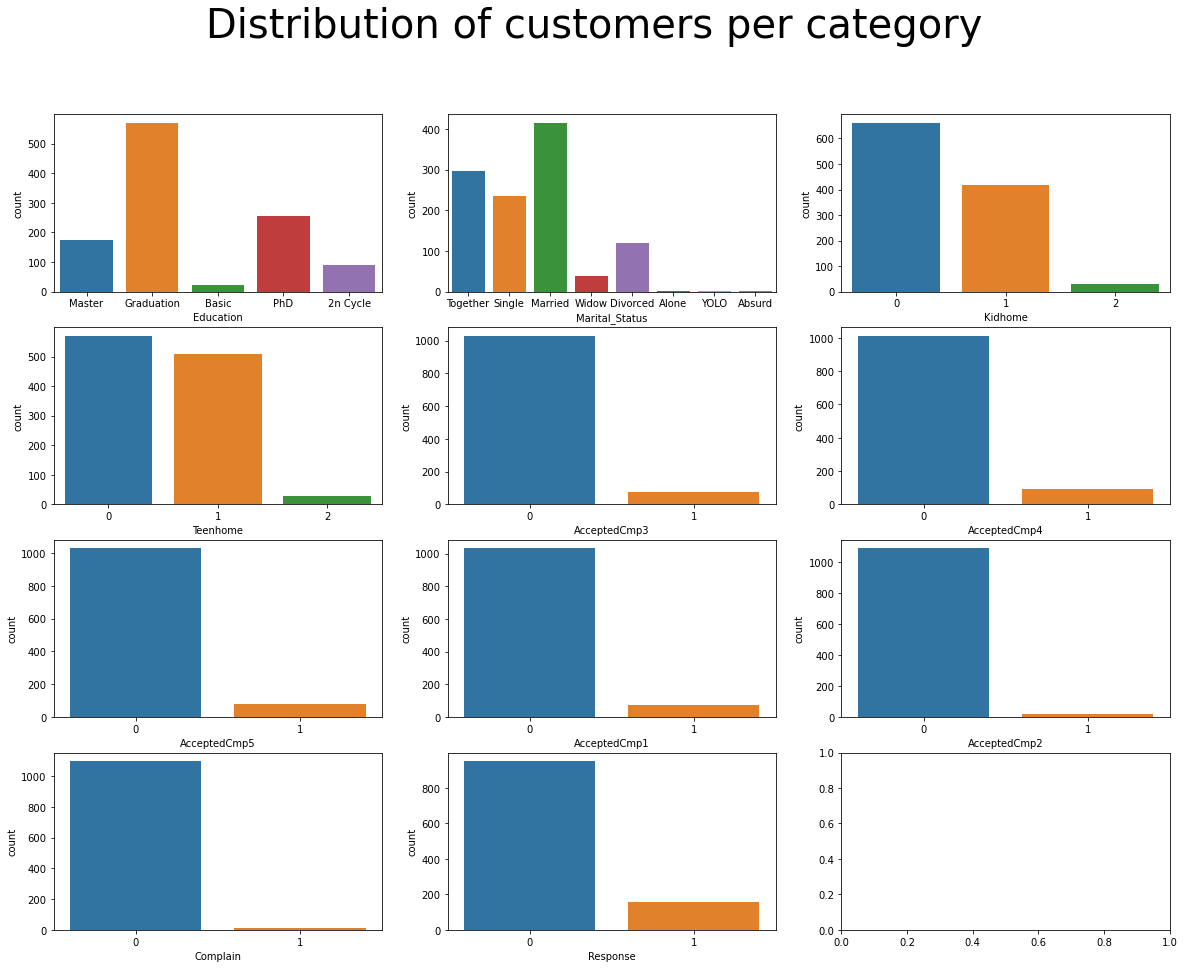

In [9]:
fig, axes = plt.subplots(4,3,figsize=(20,15))
fig.suptitle('Distribution of customers per category', fontsize=40)

for ax, feature in zip(axes.flatten(), categorical):
    sns.countplot(data=train, x=feature, ax=ax)
plt.show()

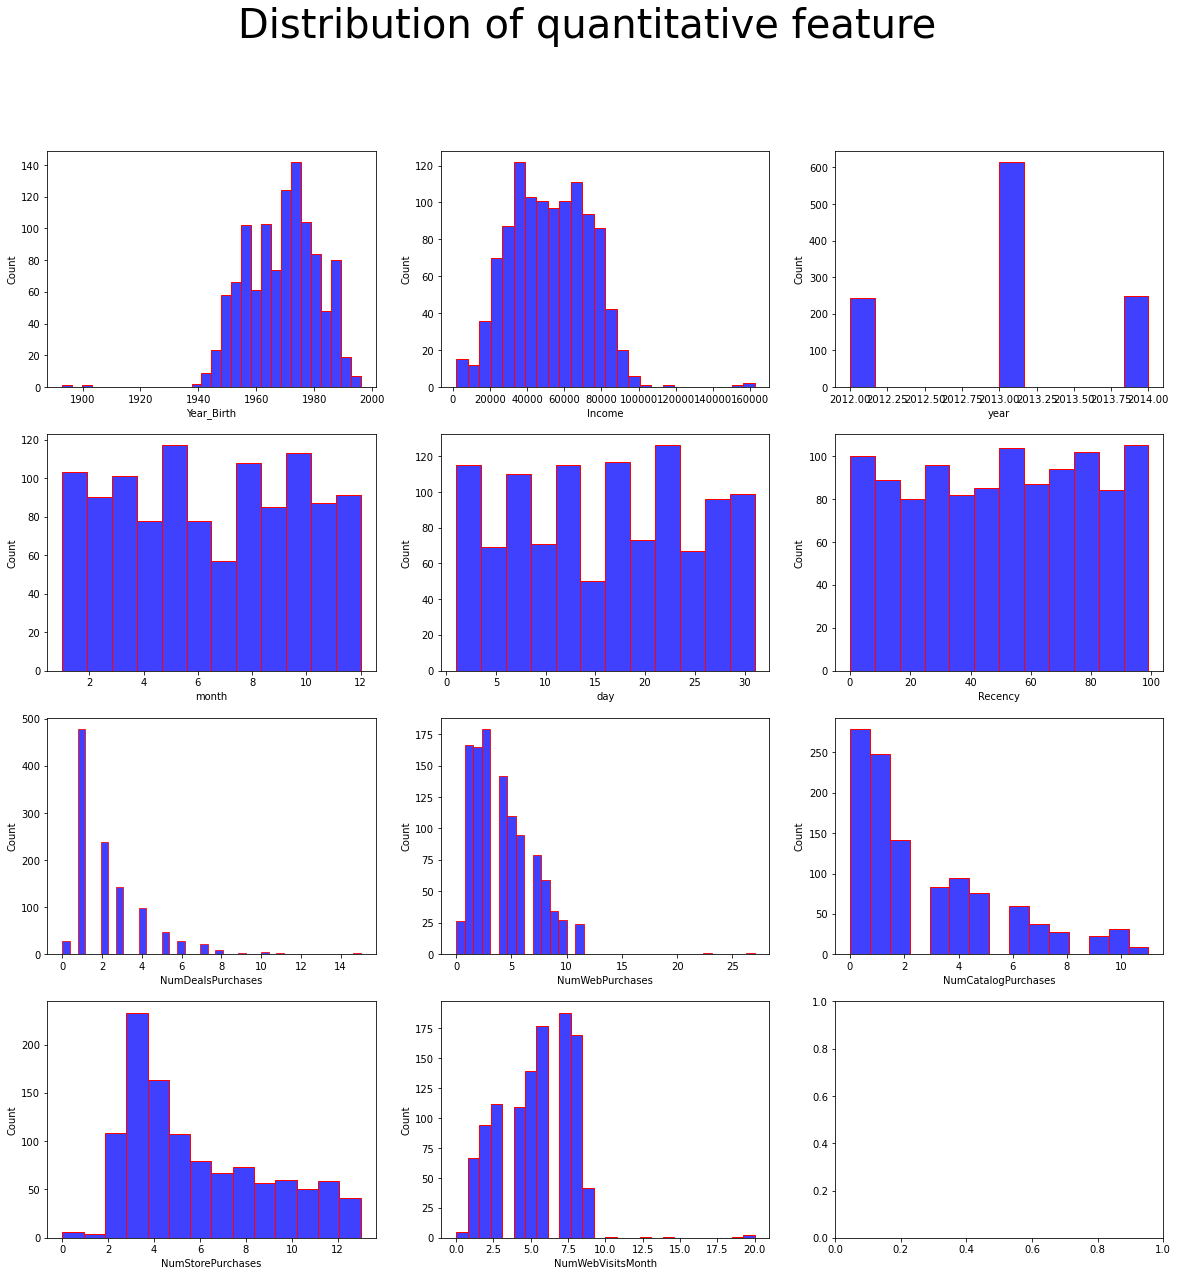

In [10]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
fig.suptitle('Distribution of quantitative feature', fontsize=40)
# plt.tight_layout()

for ax, feature in zip(axes.flatten(), quantitative):
    sns.histplot(data=train, x=feature, ax=ax, color='b', edgecolor='r')

plt.show()

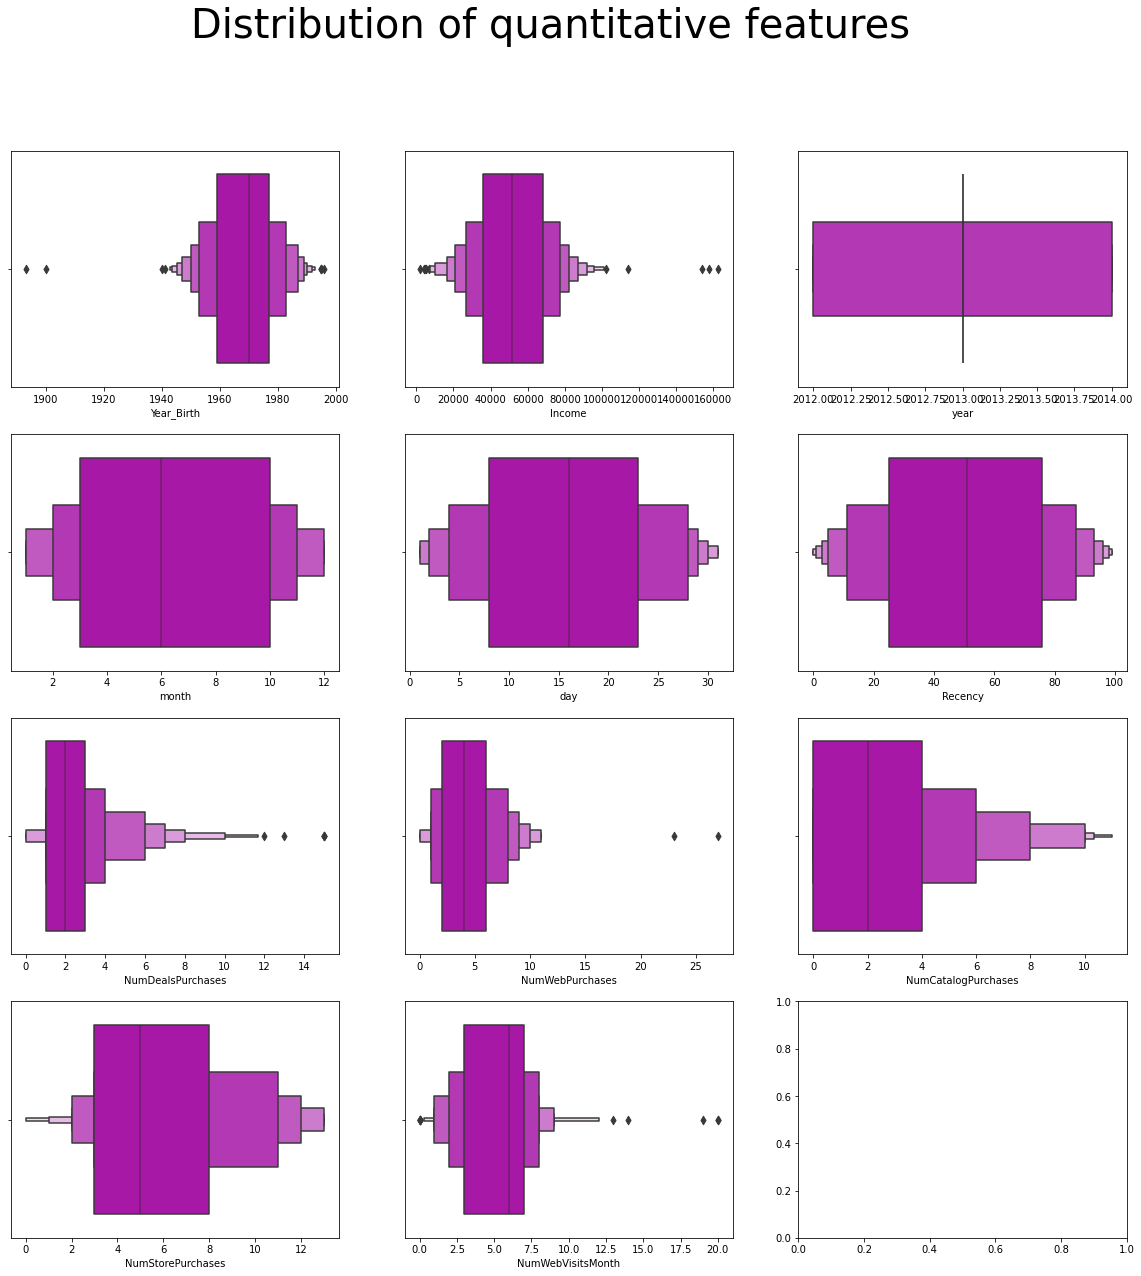

In [11]:
fig, axes = plt.subplots(4,3,figsize=(20,20))
fig.suptitle('Distribution of quantitative features', fontsize=40)

for ax, feature in zip(axes.flatten(), quantitative):
    sns.boxenplot(data=train, x=feature, ax=ax, color='m')
plt.show()

In [12]:
from scipy import stats
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return lower_bound, upper_bound

outliers = train[quantitative].apply(lambda column: IQR(column))
print('Range of outliers by method')
outliers

Range of outliers by method


,Year_Birth,Income,year,month,day,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1932.0,-13066.25,2013.0,-7.5,-14.5,-51.5,-2.0,-4.0,-6.0,-4.5,-3.0
1,2004.0,117159.75,2013.0,20.5,45.5,152.5,6.0,12.0,10.0,15.5,13.0


In [13]:
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = train[quantitative].drop(['year', 'month', 'day'], axis=1).apply(lambda column: IQRsum(column))
print('Number of outliers by method')
outliers

Number of outliers by method


Year_Birth              2
Income                  3
Recency                 0
NumDealsPurchases      46
NumWebPurchases         2
NumCatalogPurchases     9
NumStorePurchases       0
NumWebVisitsMonth       4
dtype: int64

In [14]:
quantitative.append('target')

Text(0.5, 1.0, 'Correlation between features')

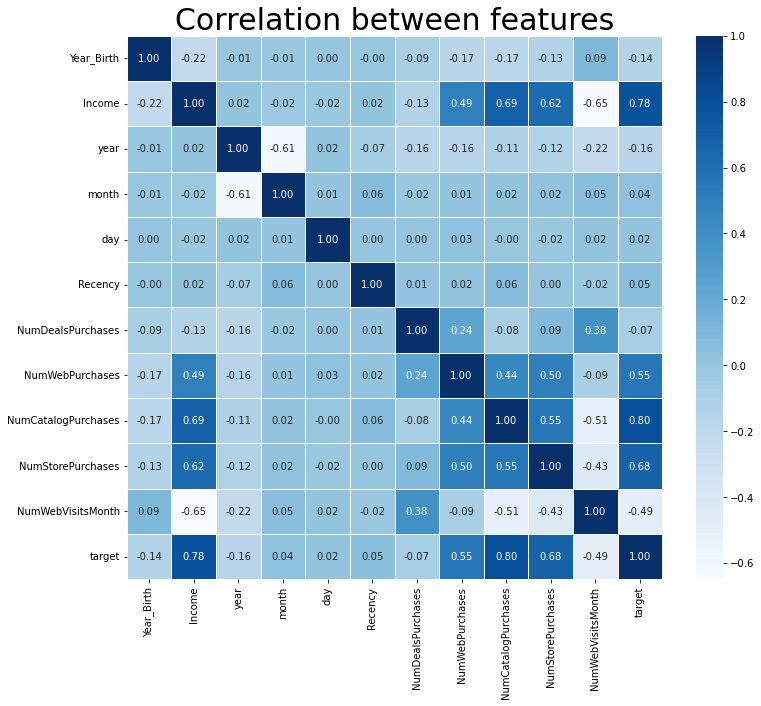

In [15]:
train_corr = train[quantitative]
scaler = MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data=corr28, annot=True, fmt='.2f', linewidth=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [16]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')

,target
target,1.000000
NumCatalogPurchases,0.798065
Income,0.784084
NumStorePurchases,0.677785
NumWebPurchases,0.546082
Recency,0.050873
month,0.037649
day,0.018917
NumDealsPurchases,-0.072802
Year_Birth,-0.136035


In [1]:
import pandas as pd
train = pd.read_csv('Customer_data/train.csv')
test = pd.read_csv('Customer_data/test.csv')
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [2]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 칼럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [4]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.Dt_Customer:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(train)

train['year'] = year
train['month'] = month
train['day'] = day

train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,0,0,0,0,0,0,541,21,1,2013
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,0,0,0,0,0,0,899,24,5,2014
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,0,0,0,0,0,0,901,8,4,2013
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,0,0,0,0,0,0,50,29,3,2014
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,0,0,1,0,0,0,444,10,6,2014


In [5]:
train.drop('Dt_Customer', axis=1, inplace=True)
train.shape

(1108, 24)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1108 non-null   int64  
 1   Year_Birth           1108 non-null   int64  
 2   Education            1108 non-null   object 
 3   Marital_Status       1108 non-null   object 
 4   Income               1108 non-null   float64
 5   Kidhome              1108 non-null   int64  
 6   Teenhome             1108 non-null   int64  
 7   Recency              1108 non-null   int64  
 8   NumDealsPurchases    1108 non-null   int64  
 9   NumWebPurchases      1108 non-null   int64  
 10  NumCatalogPurchases  1108 non-null   int64  
 11  NumStorePurchases    1108 non-null   int64  
 12  NumWebVisitsMonth    1108 non-null   int64  
 13  AcceptedCmp3         1108 non-null   int64  
 14  AcceptedCmp4         1108 non-null   int64  
 15  AcceptedCmp5         1108 non-null   i

In [7]:
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i
            label_maps[col] = label_map
    return label_maps

def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            dataframe[col] = dataframe[col].map(label_map[col])
    return dataframe

train = label_encoder(train, make_label_map(train))
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,year,month,day
0,0,1974,0,0,46014.0,1,1,21,10,7,...,0,0,0,0,0,0,541,21,1,2013
1,1,1962,1,1,76624.0,0,1,68,1,5,...,0,0,0,0,0,0,899,24,5,2014
2,2,1951,1,2,75903.0,0,1,50,2,6,...,0,0,0,0,0,0,901,8,4,2013
3,3,1974,2,2,18393.0,1,0,2,2,3,...,0,0,0,0,0,0,50,29,3,2014
4,4,1946,3,0,64014.0,2,1,56,7,8,...,0,0,1,0,0,0,444,10,6,2014


In [8]:
print(train.isna().sum())

id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
target                 0
year                   0
month                  0
day                    0
dtype: int64


In [9]:
x = train.drop(['id', 'target'], axis=1)
y = train.target

In [10]:
from sklearn.model_selection import train_test_split

data = train.drop('id', axis=1).copy()
train_data, val_data = train_test_split(data, test_size=0.3)
train_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

In [11]:
print(f'학습시킬 train셋 : {train_data.shape}')
print(f'검증할 val셋 : {val_data.shape}')

학습시킬 train셋 : (775, 24)
검증할 val셋 : (333, 24)


In [12]:
train_data_x = train_data.drop(['target', 'index'], axis=1)
train_data_y = train_data.target

val_data_x = val_data.drop(['target', 'index'], axis=1)
val_data_y = val_data.target

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data_x, train_data_y)

LinearRegression()

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

y_hat = model.predict(val_data_x)
print(f'모델 NMAE:{nmae(val_data_y, y_hat)}')

모델 NMAE:0.3062994099723698


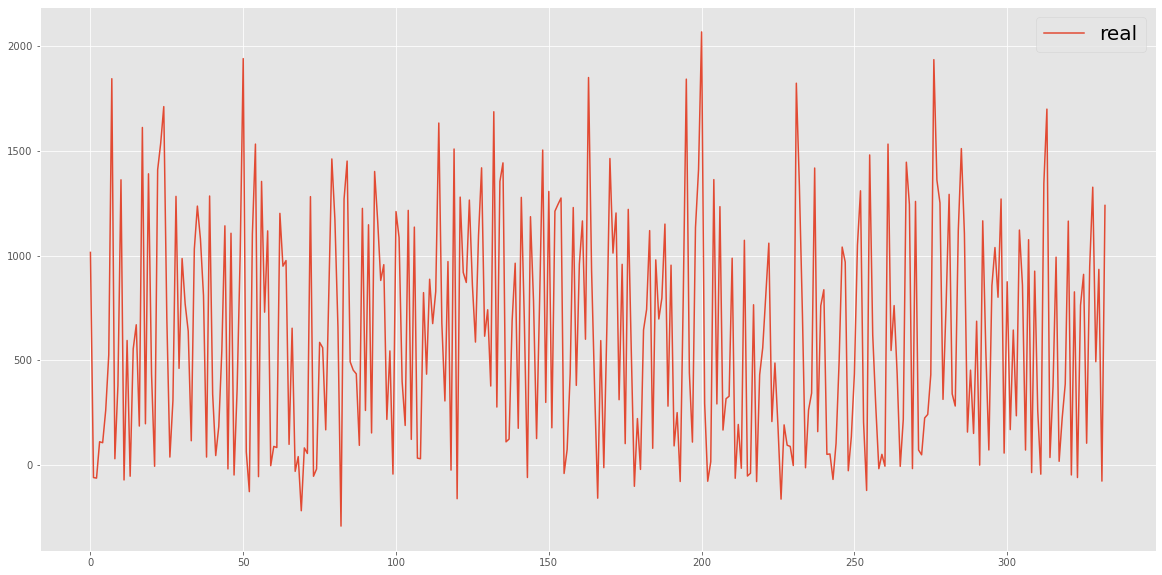

In [16]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(y_hat, label='real')
plt.legend(fontsize=20)
plt.show()

In [17]:
train_x = train.drop(['target', 'id'], axis=1)
train_y = train.target

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [18]:
check_missing_col(test)
year, month, day = seperate_datetime(test)

test = test.drop('Dt_Customer', axis=1)

test['year'] = year
test['month'] = month
test['day'] = day

test = label_encoder(test, make_label_map(test))

test = test.drop(['id'], axis=1)

test.head()

결측치가 존재하지 않습니다


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day
0,1979,0,0,57537.0,1,0,83,4,4,3,...,0,0,0,0,0,0,0,10,6,2013
1,1955,0,1,65748.0,0,1,58,2,2,4,...,0,0,0,0,0,1,0,15,4,2013
2,1984,0,2,55434.0,1,0,21,3,5,3,...,0,0,0,0,0,0,0,5,10,2013
3,1960,0,2,67716.0,0,1,8,4,7,4,...,0,1,0,0,0,0,0,10,1,2013
4,1976,0,1,85606.0,0,1,89,2,6,7,...,0,0,0,1,0,0,0,12,11,2012


In [19]:
prediction = model.predict(test)
prediction

array([757.03435304, 802.07096688, 866.83126704, ..., 197.14808615,
       696.60039718, 359.80385538])

In [20]:
submission = pd.read_csv('Customer_data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
submission['target'] = prediction

submission.head()

,id,target
0,0,757.034353
1,1,802.070967
2,2,866.831267
3,3,1178.408560
4,4,1471.943421


In [22]:
submission.to_csv('baseline1.csv', index=False)